In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [20]:
import pandas as pd
import numpy as np

# Data provided
temperature = [
    -4.662262677, -4.316559447, -4.213984765, -3.949661089, -3.578553716,
    -3.455711698, -3.108440121, -3.081303324, -2.672460827, -2.652286793,
    -2.651498033, -2.288263998, -2.11186969, -1.818937609, -1.66034773,
    -1.326378983, -1.173123268, -0.773330043, -0.673752802, -0.149634867,
    -0.036156498, -0.033895286, 0.008607699, 0.149244574, 0.688780908,
    0.693598873, 0.874905029, 1.024180814, 1.240711619, 1.359812674,
    1.740000012, 1.850551926, 1.999310369, 2.075100597, 2.31859124,
    2.471945997, 2.784836463, 2.831760211, 2.959932091, 3.020874314,
    3.211366144, 3.270044068, 3.316072519, 3.335932412, 3.610778478,
    3.704057438, 4.130867961, 4.133533788, 4.899031514
]

ice_cream_sales = [
    41.84298632, 34.66111954, 39.38300088, 37.53984488, 32.28453119,
    30.00113848, 22.63540128, 25.36502221, 19.22697005, 20.27967918,
    13.2758285, 18.12399121, 11.21829447, 10.01286785, 12.61518115,
    10.95773134, 6.68912264, 9.392968661, 5.210162615, 4.673642541,
    0.328625517, 0.897603187, 3.165600008, 1.931416029, 2.576782245,
    4.625689458, 0.789973651, 2.313806358, 1.292360811, 0.953115312,
    3.782570136, 4.857987801, 8.943823209, 8.170734936, 7.412094028,
    10.33663062, 15.99661997, 12.56823739, 21.34291574, 20.11441346,
    22.8394055, 16.98327874, 25.14208223, 26.10474041, 28.91218793,
    17.84395652, 34.53074274, 27.69838335, 41.51482194
]

# Create a DataFrame
data = {
    'Temperature (°C)': temperature,
    'Ice Cream Sales (units)': ice_cream_sales
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('ice_cream_selling_data.csv', index=False)



In [21]:
data = pd.read_csv('ice_cream_selling_data.csv')
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [22]:
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

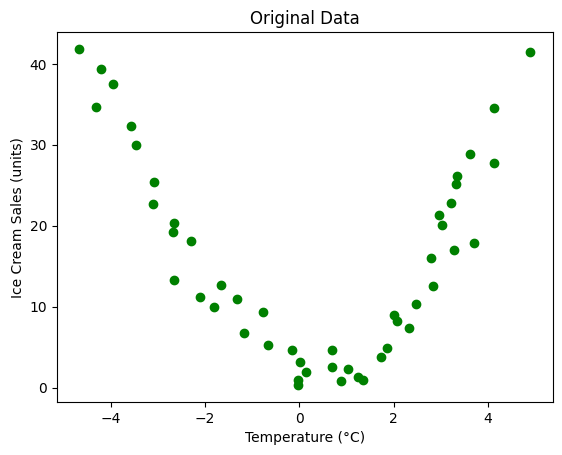

In [23]:
# Visualize the original data points
plt.scatter(X, y, color="green")
plt.title("Original Data")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

In [26]:
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

In [27]:
X_poly = poly_features.fit_transform(X)

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
#Now, fit the model (linear regression object) on the data
lr_model.fit(X_poly, y)

LinearRegression()

In [29]:
y_pred = lr_model.predict(X_poly)

df = pd.DataFrame({'Actual Values':y, 'Predicted Values':y_pred})
print(df)

    Actual Values  Predicted Values
0       41.842986         46.564507
1       34.661120         40.600548
2       39.383001         38.915089
3       37.539845         34.749272
4       32.284531         29.331940
5       30.001138         27.649735
6       22.635401         23.192862
7       25.365022         22.863178
8       19.226970         18.222266
9       20.279679         18.009098
10      13.275828         18.000794
11      18.123991         14.418541
12      11.218294         12.853070
13      10.012868         10.504868
14      12.615181          9.364587
15      10.957731          7.264266
16       6.689123          6.437055
17       9.392969          4.683654
18       5.210163          4.337906
19       4.673643          3.116139
20       0.328626          2.983983
21       0.897603          2.981829
22       3.165600          2.944811
23       1.931416          2.869446
24       2.576782          3.251711
25       4.625689          3.259923
26       0.789974          3

In [30]:
from sklearn.metrics import r2_score

# get the predicted values for test dat
y_pred = lr_model.predict(X_poly)
r2 = r2_score(y, y_pred)
print(r2)

0.9321137090299405


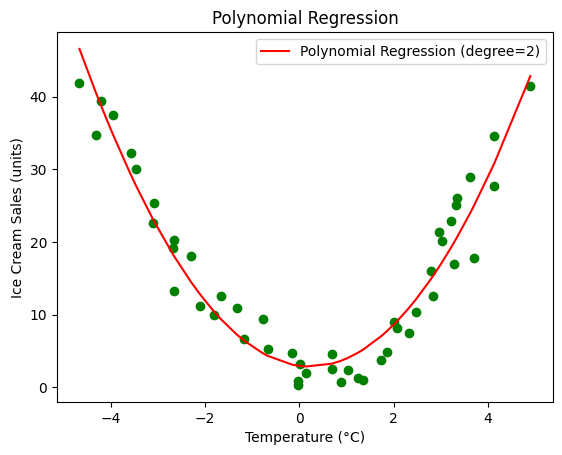

In [31]:
import matplotlib.pyplot as plt

# Visualize the polynomial regression results
plt.scatter(X, y, color="green")
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.title('Polynomial Regression')
plt.show()